<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S3E25_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S3E25 Mohs_Hardness - KAGGLE Competition**

Hardness, or the quantitative value of resistance to permanent or plastic deformation, plays a very crucial role in materials design in many applications, such as ceramic coatings and abrasives. Hardness testing is an especially useful method as it is non-destructive and simple to implement to gauge the plastic properties of a material. In this study, I proposed a machine, or statistical, learning approach to predict hardness in naturally occurring materials, which integrates atomic and electronic features from composition directly across a wide variety of mineral compositions and crystal systems. First, atomic and electronic features from the composition, such as van der Waals and covalent radii as well as the number of valence electrons, were extracted from the composition.

In this study, the author trained a set of classifiers to understand whether compositional features can be used to predict the Mohs hardness of minerals of different chemical spaces, crystal structures, and crystal classes. The dataset for training and testing the classification models used in this study originated from experimental Mohs hardness data, their crystal classes, and chemical compositions of naturally occurring minerals reported in the Physical and Optical Properties of Minerals CRC Handbook of Chemistry and Physics and the American Mineralogist Crystal Structure Database. The database is composed of 369 uniquely named minerals. Due to the presence of multiple composition combinations for minerals referred to by the same name, the first step was to perform compositional permutations on these minerals. This produced a database of 622 minerals of unique compositions, comprising 210 monoclinic, 96 rhombohedral, 89 hexagonal, 80 tetragonal, 73 cubic, 50 orthorhombic, 22 triclinic, 1 trigonal, and 1 amorphous structure. An independent dataset was compiled to validate the model performance. The validation dataset contains the composition, crystal structure, and Mohs hardness values of 51 synthetic single crystals reported in the literature. The validation dataset includes 15 monoclinic, 7 tetragonal, 7 hexagonal, 6 orthorhombic, 4 cubic, and 3 rhombohedral crystal structures.

In this study, the author constructed a database of compositional feature descriptors that characterize naturally occurring materials obtained directly from the Physical and Optical Properties of Minerals CRC Handbook45. This comprehensive compositional-based dataset allows us to train models that are able to predict hardness across a wide variety of mineral compositions and crystal classes. Each material in both the naturally occurring mineral and artificial single crystal datasets was represented by 11 atomic descriptors. The elemental features are the number of electrons, number of valence electrons, atomic number, Pauling electronegativity of the most common oxidation state, covalent atomic radii, van der Waals radii, and ionization energy of neutral.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Mineral_Dataset_Supplementary_Info.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
#!pip install keras-nlp
#!pip install MiniSom

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import umap
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7_ = sns.color_palette("tab20c", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     ShuffleSplit,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             median_absolute_error,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 45.20511555671692 sec


<Figure size 640x480 with 0 Axes>

In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.0
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.2


### **1.1 Utility Functions**

#### Graph Functions:

In [21]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    return summ


def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(15, 5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette='viridis', ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}')
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)

    plt.tight_layout()
    plt.show()

def scatter_corr_plot(data_set=None, variables=None, target=None):
    if data_set is None or variables is None or target is None:
        raise ValueError("Please provide data_set and variables.")

    target = 'Hardness'

    full_features = data_set.columns.tolist()
    num_var = [column for column in data_set.columns if data_set[column].nunique() > 10]
    cat_var = [column for column in data_set.columns if data_set[column].nunique() < 10]


    num_rows = len(num_var)
    num_cols = 3

    total_plots = num_rows*num_cols
    plt.figure(figsize=(14,num_rows*2.5))

    for idx, col in enumerate(num_var):
        plt.subplot(num_rows, num_cols, idx % total_plots + 1)
        sns.scatterplot(x=col, y=target, data=data_set, color='#82B0D2',s=10)

        sns.regplot(x=col, y=target, data=data_set, scatter=False, color='#FA7F6F')

        corr_coef = data_set[target].corr(data_set[col])
        plt.text(0.95, 0.95, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
        mean_value = data_set[col].mean()

        plt.axvline(x=mean_value, color='black', linestyle='--', linewidth=1, label='Mean Value')
        plt.title(f"{col} : {target}")

    plt.tight_layout()
    plt.show()

def correlation_plot(data_train=None, data_test=None, variables=None):
    if data_train is None or data_test is None or variables is None:
        raise ValueError("Please provide data_train, data_test and variables.")
    corr_matrix_train = data_train[variables].corr()
    corr_matrix_test = data_test[variables].corr()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), gridspec_kw={'width_ratios': [0.80, 1.0]})
    sns.heatmap(corr_matrix_train, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[0], cbar = False)
    axes[0].set_title('Train Set', fontsize=15)

    sns.heatmap(corr_matrix_test, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[1], yticklabels=False, cbar = True, cbar_kws={"shrink": .50})
    axes[1].set_title('Test Set', fontsize=15)

    plt.suptitle('Correlation Matrices of Train and Test Sets', fontsize=25, weight = 'bold',y=0.9)
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.show()

def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(10, 3.5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette=palette_1, ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}', fontsize=10)
        ax.set_xlabel(x_var, fontsize=7)
        ax.set_ylabel(y_var, fontsize=7)

    plt.tight_layout()
    plt.show()

def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()

def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('MedAE')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: integer encoded target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: integer encoded target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

#### Data Analysis Functions

In [5]:
def adversarial_validation(data_train, data_test, target='Hardness',is_train_test="True"):

    adv_train = data_train.drop(target, axis = 1)
    adv_test = data_test.copy()
    if is_train_test==False:
      adv_test = adv_test.drop(target, axis = 1)

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1
    adv = pd.concat([adv_train, adv_test], ignore_index = True)
    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled['is_test']

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (6, 6))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'Train-Test Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def search_high_corr_pairs(data_set = None, variables =None, threshold = 0.7):
    corr_matrix=data_set[variables].corr()
    high_corr_pairs=[]

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1,len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(f'\033[91m{corr_matrix.columns[i]}\033[0m and \033[91m{corr_matrix.columns[j]}\033[0m are highly linearly correlated, indicating the possibility of collinearity.')
                high_corr_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))
    return high_corr_pairs


def transform_features(train,test):
  train_ = train.copy()
  test_ = test.copy()

  feat_log_transf = ["allelectrons_Total","density_Total","allelectrons_Average","atomicweight_Average",
                     "ionenergy_Average","zaratio_Average","density_Average"]

  feat_power_transf = ["val_e_Average","R_vdw_element_Average","el_neg_chi_Average"]

  log_transformer = FunctionTransformer(lambda x: np.log(x+1.0))
  power_transformer = FunctionTransformer(lambda x: np.power(x,2.0))

  for feat in feat_log_transf:
    train_[feat] = log_transformer.transform(train_[feat])
    test_[feat] = log_transformer.transform(test_[feat])

  for feat in feat_power_transf:
    train_[feat] = power_transformer.transform(train_[feat])
    test_[feat] = power_transformer.transform(test_[feat])

  return train_, test_


def replace_zeros(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_.replace({0:np.nan},inplace=True)
  test_.replace({0:np.nan},inplace=True)

  train_["nan_marker"] = train_.isna().any(axis=1).astype("int")
  test_["nan_marker"] = test_.isna().any(axis=1).astype("int")

  total = pd.concat([train_, test_], ignore_index=True)
  total.drop("Hardness",axis=1,inplace=True)

  total_col = list(total.columns)

  imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state = 0)
  imputer.fit(total[total_col])
  train_[total_col] = imputer.transform(train_[total_col])
  test_[total_col] = imputer.transform(test_[total_col])

  return train_, test_

def clip_values(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_["allelectrons_Total"] = train_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)
  test_["allelectrons_Total"] = test_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)

  train_["allelectrons_Average"] = train_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)
  test_["allelectrons_Average"] = test_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)

  train_["val_e_Average"] = train_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["val_e_Average"] = test_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["atomicweight_Average"] = train_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["atomicweight_Average"] = test_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["density_Total"] = train_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)
  test_["density_Total"] = test_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)

  train_["el_neg_chi_Average"] = train_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)
  test_["el_neg_chi_Average"] = test_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)

  train_["R_vdw_element_Average"] = train_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)
  test_["R_vdw_element_Average"] = test_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)

  train_["R_cov_element_Average"] = train_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)
  test_["R_cov_element_Average"] = test_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)

  train_["zaratio_Average"] = train_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)
  test_["zaratio_Average"] = test_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)

  train_["density_Average"] = train_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)
  test_["density_Average"] = test_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)

  train_["ionenergy_Average"] = train_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)
  test_["ionenergy_Average"] = test_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)


  return train_, test_

def prepare_dataset(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_,test_ = transform_features(train_,test_)
  train_,test_ = replace_zeros(train_,test_)
  train_,test_ = clip_values(train_,test_)

  return train_, test_

* LGBM Classifier

In [ ]:
def fit_lgbm(params, train, test, features = None, model_names = None,
            n_splits = N_SPLITS, do_feat_imp = False, seed = SEED, verbose = False):

    if features is None:
        features = test.columns
    feat_imp = FeatureImportance(n_permutations = 2, lib_metric = "Logloss")
    best_iteration, val_logloss, trn_logloss= [], [], []
    eval_result={}
    callbacks = [early_stopping(100), record_evaluation(eval_result)]
    if verbose:
        callbacks.append(log_evaluation(100))

    oof = pd.Series(0, index=train.index)
    y_predicted = pd.Series(0, index=train.index)

    # CV loop...
    folds = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = seed)
    for fold, (trn_idx, val_idx) in enumerate(folds.split(train, train["Class"])):

        X_trn, X_val = train.loc[trn_idx, features], train.loc[val_idx, features]
        y_trn, y_val = train.loc[trn_idx, "Class"], train.loc[val_idx, "Class"]

        # TRAIN MODEL
        model = LGBMClassifier(**params)
        model.fit(X_trn, y_trn,
                  eval_set = [(X_val, y_val)],
                  eval_metric = "binary_logloss",
                  callbacks = callbacks)
        if model_names is not None:
            os.chdir(folders_trees)
            pickle.dump(model, open(f'{model_names}_{fold}.pkl', 'wb'))
            os.chdir(folder_data)
        best_iteration.append(model.best_iteration_)

        # Results, score
        oof.loc[val_idx] = model.predict_proba(X_val, num_iteration = best_iteration[fold])[:,1]
        y_predicted.loc[val_idx] = model.predict_proba(X_val, num_iteration = best_iteration[fold])[:,1]

        val_logloss.append(log_loss(y_val, oof.loc[val_idx]))
        trn_logloss.append(log_loss(y_trn, model.predict_proba(X_trn, num_iteration = best_iteration[fold])[:,1]))
        print(f'Fold {fold + 1} - Valid : {val_logloss[fold]:.5f} - Train : {trn_logloss[fold]:.5f} - Best it. : {best_iteration[fold]:4}')

        # Feature Importance by value permutation
        if do_feat_imp:
            for feat in features:
                for i in range(feat_imp.n_permutations):
                    temp_df = X_val.copy()
                    temp_df[feat] = np.random.permutation(temp_df[feat])
                    prediction = model.predict_proba(temp_df, num_iteration = best_iteration[fold])[:,1]
                    feat_imp.append(feat, log_loss(y_val, prediction), val_logloss[fold])

    # End CV Loop
    print(f"{log_loss(train['Class'], oof):.5f} - Mean {np.mean(val_logloss):.5f} - Overfeat {np.mean(trn_logloss) - np.mean(val_logloss):.5f} - Std {np.std(val_logloss):.5f}")

    return {"oof":oof, "feat_imp":feat_imp, "oof_score":log_loss(train['Class'], oof), "overfeat":np.mean(trn_logloss) - np.mean(val_logloss),
           "best_iteration":best_iteration}

### **1.2 Connect Drives**

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [7]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E25_Mohs_Hardness"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/neural_networks/"

list_directories = [folder_data,models_folders,folders_nn]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E25_Mohs_Hardness already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/neural_networks/ already exists


## 2.0 Upload Data and Create new Target Feature

In [9]:
train_ = pd.read_csv("train_final.csv",index_col=0)
test = pd.read_csv("test_final.csv",index_col=0)

float_cols = train_.select_dtypes("float").columns
int_cols = train_.select_dtypes("int").columns

train_[float_cols]=train_[float_cols].astype("float32")
train_[int_cols]=train_[int_cols].astype("int32")

test[float_cols]=test[float_cols].astype("float32")
test[int_cols]=test[int_cols].astype("int32")

**Create new Target**

In [10]:
train = train_.copy()

train["target"] = train["Hardness"].apply(lambda x: 0 if x<=8 else 1)
train.drop("Hardness",axis=1,inplace=True)

train["target"].value_counts()

0    10890
1      116
Name: target, dtype: int64

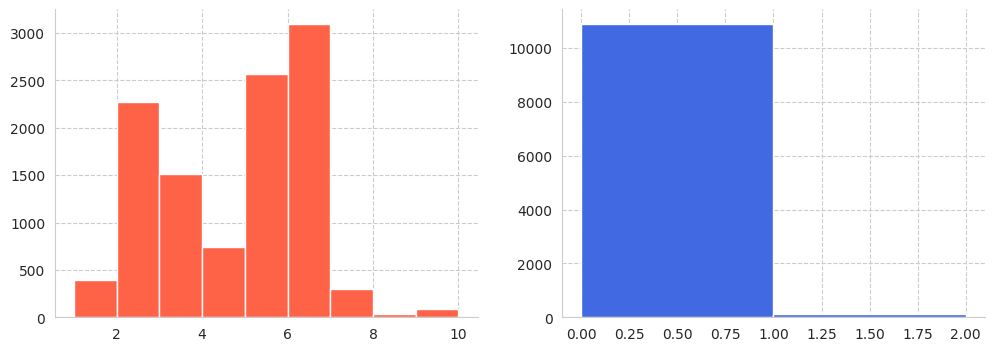

In [11]:
fig, axs = plt.subplots(1,2,figsize=(12,4))

axs[0].hist(train_["Hardness"], range=(1,10),bins=[1,2,3,4,5,6,7,8,9,10],color="tomato");

axs[1].hist(train["target"], range=(1,10),bins=[0,1,2],color="royalblue");

## Dimension Reduction

In [15]:
cols_umap = ['allelectrons_Total', 'density_Total', 'allelectrons_Average',
              'val_e_Average', 'ionenergy_Average', 'el_neg_chi_Average',
              'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average',
              'density_Average', 'nan_marker', 'awa_cat', 'grouped_atomicweight',
              'density_per_valence', 'combined_feature', 'atomicweight_density_diff']

In [16]:
''''
data=train[cols_umap]
scaler = StandardScaler()
data = scaler.fit_transform(data)
data=pd.DataFrame(data=data,columns=)

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric )

    u = fit.fit_transform(data);

    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=train["target"], cmap=palette_7_)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=train["target"], cmap=palette_7_)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=train["target"], s=100, cmap=palette_7_)

    plt.title(title, fontsize=18)
'''

'\'\ndata=train[cols_umap]\nscaler = StandardScaler()\ndata = scaler.fit_transform(data)\ndata=pd.DataFrame(data=data,columns=)\n\ndef draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric=\'euclidean\', title=\'\'):\n    fit = umap.UMAP(\n        n_neighbors=n_neighbors,\n        min_dist=min_dist,\n        n_components=n_components,\n        metric=metric )\n    \n    u = fit.fit_transform(data);\n    \n    fig = plt.figure()\n    if n_components == 1:\n        ax = fig.add_subplot(111)\n        ax.scatter(u[:,0], range(len(u)), c=train["target"], cmap=palette_7_)\n    if n_components == 2:\n        ax = fig.add_subplot(111)\n        ax.scatter(u[:,0], u[:,1], c=train["target"], cmap=palette_7_)\n    if n_components == 3:\n        ax = fig.add_subplot(111, projection=\'3d\')\n        ax.scatter(u[:,0], u[:,1], u[:,2], c=train["target"], s=100, cmap=palette_7_)\n    \n    plt.title(title, fontsize=18)\n'

In [ ]:
#for n in (10, 15, 20, 50, 75):
#    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

## 3.0 LGBM

### 3.1 GridSearchCV:

In [17]:
features = list(train.drop(columns="target").columns)

data=train.copy()
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
data.head(3)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,...,atomicweight_density_diff,tree_feat_v57,tree_feat_v84,tree_feat_v3,tree_feat_v60,tree_feat_v33,tree_feat_v94,tree_feat_v56,tree_feat_v58,target
0,-0.024013,-2.640665,-0.753418,0.357416,0.104590,0.532686,-0.102192,-0.545404,-0.008709,-0.667288,...,-0.188510,0.885928,1.175977,0.673580,0.947458,1.050356,0.886410,0.983359,1.044400,0
1,-0.024013,-0.503671,-0.753418,0.357416,0.934462,0.485802,-0.833963,-0.236852,-0.078184,-0.878571,...,0.127324,0.691781,0.683105,0.572161,0.514388,0.812322,0.775129,0.557904,0.283824,0
2,-0.413379,-0.303093,0.098218,1.996949,0.972538,0.800430,0.322484,-0.520720,-0.313083,-0.143141,...,0.496165,-0.653068,-0.983760,0.257307,-0.954458,0.645268,0.151244,-1.431252,-0.885675,0


In [18]:
params = {
    "random_state":SEED+1,
    "objective":"binary",
    "num_leaves":5,
    "learning_rate":.05,
    "subsample":.5,
    "colsample_bytree":.5,
    "reg_alpha":5,
    "reg_lambda":5,
    "max_bin":255,
    "min_child_samples":20,
    "min_child_weight":.1,
    "n_estimators":1000
    }

# Initiate classifier to use
mdl = LGBMClassifier(**params, n_jobs=-1,silent = True, scale_pos_weight=90, refit=True)

# To view the default model parameters:
mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin', 'silent', 'scale_pos_weight', 'refit'])

In [19]:
%%time
gridParams = {
              'num_leaves': [20,40], # large num_leaves helps improve accuracy but might lead to over-fitting
              'boosting_type' : ['gbdt'],
              'colsample_bytree' : [0.50,0.75],
              'subsample' : [0.50,0.75],
              'reg_alpha' : [0,1],
              'reg_lambda' : [0,1],
              'min_child_samples' : [20,40]
              }

grid = GridSearchCV(mdl, gridParams, verbose=4, cv=3, n_jobs=-1, scoring="f1")
# Run the grid
grid.fit(train[features], train["target"])

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[LightGBM] [Warning] Unknown parameter: refit
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: refit
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 116, number of negative: 10890
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5023
[LightGBM] [Info] Number of data points in the train set: 11006, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010540 -> initscore=-4.542010
[LightGBM] [Info] Start training from score -4.542010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [20]:
# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.5, 'min_child_samples': 40, 'num_leaves': 20, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.5}
0.4963827400615397


In [83]:
# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'colsample_bytree': 0.5, 'min_child_samples': 40, 'num_leaves': 20, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.5}
0.4963827400615397


### 3.2 Fit Best Model

In [ ]:
params_lgbm = {
    "random_state":SEED+1,
    "objective":"binary",
    "num_leaves":20,
    "learning_rate":.05,
    "subsample":.5,
    "colsample_bytree":.5,
    "reg_alpha":0,
    "reg_lambda":1,
    "max_bin":255,
    "min_child_samples":40,
    "n_estimators":2000}

features_lgbm = ['relative_velocity',
                  'miss_distance',
                  'volume',
                  'energy',
                  'miss_distance_energy']


res_lgbm = fit_lgbm(params_lgbm, train= train_trans, test=test_trans, model_names = "lgbm", features = features_lgbm, #n_splits = 5,
                    do_feat_imp = True, seed = SEED, verbose = False)

res_lgbm["feat_imp"].plot()

y_predicted = [0 if z<0.5 else 1 for z in res_lgbm["oof"].values]
plot_confusion_matrix(train["Class"], y_predicted, labels=[0,1])
print("\n",classification_report(y_true=train["Class"], y_pred=y_predicted))